In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Task 1: Data Understanding and Visualization:

Total images selected: 6


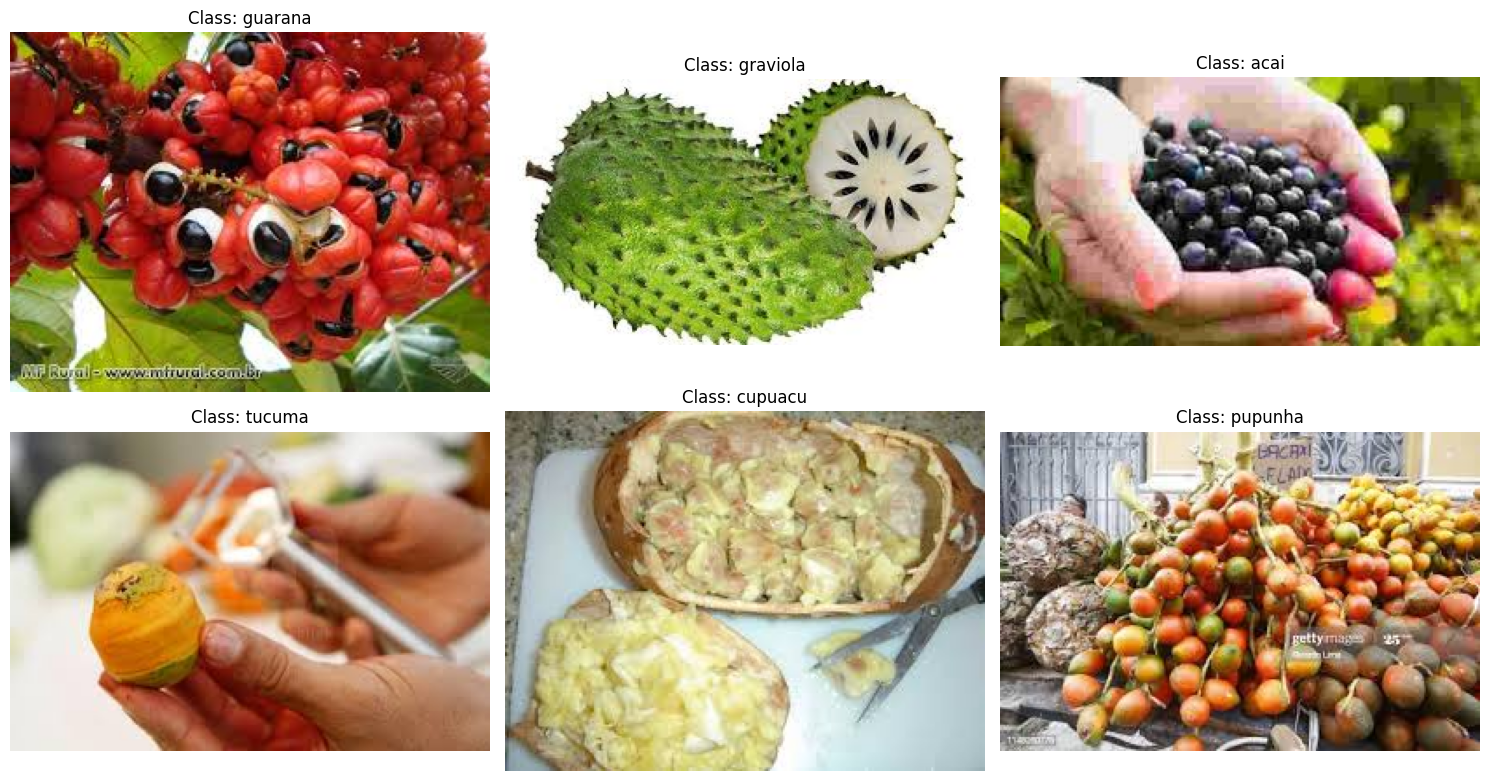

In [2]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Set the dataset path
dataset_path = "/content/drive/MyDrive/FruitinAmazon/FruitinAmazon/train"

# Get the list of class directories (each representing a fruit type)
classes = os.listdir(dataset_path)

# Prepare a list of random images from each class
images = []
for class_name in classes:
    class_path = os.path.join(dataset_path, class_name)
    # Choose a random image from the class
    random_image = random.choice(os.listdir(class_path))
    image_path = os.path.join(class_path, random_image)
    images.append((image_path, class_name))

# Check how many images we are displaying
print(f"Total images selected: {len(images)}")

# Set up the figure and axes for plotting (2 rows, based on number of classes)
fig, axes = plt.subplots(nrows=2, ncols=len(classes)//2, figsize=(15, 8))
axes = axes.flatten()

# Plot images in a 2-row grid
for i, (image_path, class_name) in enumerate(images):
    img = mpimg.imread(image_path)
    axes[i].imshow(img)
    axes[i].set_title(f"Class: {class_name}")
    axes[i].axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [4]:
import os
from PIL import Image

# Set the dataset path for the 'train' directory
dataset_path = "/content/drive/MyDrive/FruitinAmazon/FruitinAmazon/train"

# List to keep track of all corrupted image paths
corrupted_images = []

# Iterate through each class (subdirectory) in the 'train' folder
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)

    # Make sure we're working with a directory
    if os.path.isdir(class_path):
        # Iterate through each image in the class directory
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)

            try:
                # Attempt to open the image
                with Image.open(image_path) as img:
                    img.verify()  # Verify if it's a valid image
            except (IOError, SyntaxError) as e:
                # If image is corrupted, remove it
                os.remove(image_path)
                corrupted_images.append(image_path)
                print(f"Removed corrupted image: {image_path}")

# Report the result
if not corrupted_images:
    print("No corrupted images found.")
else:
    print(f"\nTotal corrupted images removed: {len(corrupted_images)}")


No corrupted images found.


Task 2: Loading and Preprocessing Image Data in keras:

In [5]:
import tensorflow as tf

# Define image size and batch size
img_height = 128  # Example image height
img_width = 128  # Example image width
batch_size = 32
validation_split = 0.2  # 80% training, 20% validation

# Set dataset path
train_dir = "/content/drive/MyDrive/FruitinAmazon/FruitinAmazon/train"

# Create a preprocessing layer for normalization
rescale = tf.keras.layers.Rescaling(1./255)  # Normalize pixel values to [0, 1]

# Load the training dataset with normalization
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',  # Use subdirectory names as labels
    label_mode='int',  # Encode labels as integers
    image_size=(img_height, img_width),  # Resize images to the specified size
    interpolation='nearest',  # Method to use for resizing
    batch_size=batch_size,
    shuffle=True,
    validation_split=validation_split,
    subset='training',  # This subset will be used for training
    seed=123  # For reproducibility of the dataset split
)

# Apply the normalization (Rescaling) to the training dataset
train_ds = train_ds.map(lambda x, y: (rescale(x), y))

# Load the validation dataset with normalization
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',  # Use subdirectory names as labels
    label_mode='int',  # Encode labels as integers
    image_size=(img_height, img_width),  # Resize images to the specified size
    interpolation='nearest',  # Method to use for resizing
    batch_size=batch_size,
    shuffle=False,  # No need to shuffle the validation data
    validation_split=validation_split,
    subset='validation',  # This subset will be used for validation
    seed=123  # For reproducibility of the dataset split
)

# Apply the normalization (Rescaling) to the validation dataset
val_ds = val_ds.map(lambda x, y: (rescale(x), y))

# Display the first batch to check
for images, labels in train_ds.take(1):
    print(f"Images shape: {images.shape}")
    print(f"Labels shape: {labels.shape}")


Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.
Images shape: (32, 128, 128, 3)
Labels shape: (32,)


Task 3 - Implement a CNN with

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model architecture
model = models.Sequential()

# Convolutional Layer 1
model.add(layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu', input_shape=(128, 128, 3)))
# Pooling Layer 1 (Max Pooling)
model.add(layers.MaxPooling2D((2, 2), strides=2))

# Convolutional Layer 2
model.add(layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu'))
# Pooling Layer 2 (Max Pooling)
model.add(layers.MaxPooling2D((2, 2), strides=2))

# Flatten Layer
model.add(layers.Flatten())

# Fully Connected Network Architecture (Hidden Layers)
model.add(layers.Dense(64, activation='relu'))  # Hidden Layer 1 with 64 neurons
model.add(layers.Dense(128, activation='relu'))  # Hidden Layer 2 with 128 neurons

# Output Layer (number of neurons = number of classes)
# Assuming num_classes is known (e.g., 5 or 10 classes)
num_classes = 5  # Update this according to your dataset
model.add(layers.Dense(num_classes, activation='softmax'))  # Output layer with softmax for multi-class classification

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summarize the model to check its architecture
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,325 (8.07 MB)

 Trainable params: 2,116,325 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

Task 4: Compile and Train the Model

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(6, activation='softmax')  # Changed to 6 to match the number of classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_ds,
    epochs=250,
    validation_data=val_ds,
    batch_size=16,
    callbacks=[
        ModelCheckpoint('best_model.h5', save_best_only=True, save_weights_only=False),
        EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    ]
)


Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 612ms/step - accuracy: 0.0943 - loss: 1.9228

3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 887ms/step - accuracy: 0.0985 - loss: 1.9430 - val_accuracy: 0.0000e+00 - val_loss: 3.3432
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step - accuracy: 0.1348 - loss: 2.1821

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 532ms/step - accuracy: 0.1359 - loss: 2.1646 - val_accuracy: 0.1667 - val_loss: 1.9877
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step - accuracy: 0.1186 - loss: 1.7888

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 517ms/step - accuracy: 0.1272 - loss: 1.7781 - val_accuracy: 0.5556 - val_loss: 1.4816
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - accuracy: 0.2361 - loss: 1.6374

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 582ms/step - accuracy: 0.2292 - loss: 1.6411 - val_accuracy: 0.8889 - val_loss: 1.3048
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 528ms/step - accuracy: 0.5742 - loss: 1.5645 - val_accuracy: 0.6111 - val_loss: 1.4181
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 826ms/step - accuracy: 0.7617 - loss: 1.3725 - val_accuracy: 0.3889 - val_loss: 1.3362
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step - accuracy: 0.6603 - loss: 1.1083

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 528ms/step - accuracy: 0.6584 - loss: 1.1047 - val_accuracy: 0.6111 - val_loss: 0.9641
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step - accuracy: 0.7251 - loss: 0.8561

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 595ms/step - accuracy: 0.7244 - loss: 0.8553 - val_accuracy: 0.7222 - val_loss: 0.7924
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 487ms/step - accuracy: 0.8464 - loss: 0.5925 - val_accuracy: 0.6111 - val_loss: 0.9081
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step - accuracy: 0.7182 - loss: 0.5577

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 746ms/step - accuracy: 0.7296 - loss: 0.5497 - val_accuracy: 0.7778 - val_loss: 0.5756
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 652ms/step - accuracy: 0.8495 - loss: 0.3908

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 908ms/step - accuracy: 0.8524 - loss: 0.3873 - val_accuracy: 0.8889 - val_loss: 0.4760
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 562ms/step - accuracy: 0.9813 - loss: 0.1939 - val_accuracy: 0.7222 - val_loss: 0.8077
Epoch 13/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 552ms/step - accuracy: 0.9931 - loss: 0.1270 - val_accuracy: 0.8889 - val_loss: 0.5233
Epoch 14/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step - accuracy: 1.0000 - loss: 0.0746

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 525ms/step - accuracy: 1.0000 - loss: 0.0753 - val_accuracy: 0.8333 - val_loss: 0.4000
Epoch 15/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 481ms/step - accuracy: 0.9705 - loss: 0.0803 - val_accuracy: 0.8333 - val_loss: 0.5774
Epoch 16/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 529ms/step - accuracy: 1.0000 - loss: 0.0325 - val_accuracy: 0.8889 - val_loss: 0.7330
Epoch 17/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 969ms/step - accuracy: 1.0000 - loss: 0.0559 - val_accuracy: 0.8889 - val_loss: 0.5672
Epoch 18/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 536ms/step - accuracy: 1.0000 - loss: 0.0129 - val_accuracy: 0.8333 - val_loss: 0.4535
Epoch 19/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 483ms/step - accuracy: 1.0000 - loss: 0.0092 - val_accuracy: 0.8333 - val_loss: 0.4583
Epoch 20/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 469ms/step - accuracy: 1.0000 - loss: 0.0067 - val_accuracy: 0.8889 - val_loss: 0.5211
Epoch 21/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 488ms/step - accuracy: 1.0000 - loss: 0.0059 - val_accuracy: 0.8889 - val_lo

Task 5: Evaluate the Model

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up ImageDataGenerator for test data
test_datagen = ImageDataGenerator(rescale=1./255)  # Rescale pixel values to [0, 1]

# Define the path to your test data
test_dir = '/content/drive/MyDrive/FruitinAmazon/FruitinAmazon/test'

# Define the test dataset
test_ds = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),  # Resize images to the expected input size
    batch_size=16,
    class_mode='sparse',  # Use 'sparse' since you are using sparse categorical crossentropy
    shuffle=False  # No need to shuffle test data
)

# Now evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_ds)

# Print the test loss and accuracy
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Found 30 images belonging to 6 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.6944 - loss: 0.8338
Test Loss: 0.9236293435096741
Test Accuracy: 0.6666666865348816


Task 6: Save and Load the Model

In [17]:
from tensorflow.keras.models import load_model

# Save the model
model.save('trained_model.h5')

# Load the saved model
loaded_model = load_model('fruit_model.h5')

# Evaluate the loaded model on the test set
test_loss, test_accuracy = loaded_model.evaluate(test_ds)

# Print the test loss and accuracy
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.6944 - loss: 0.8338
Test Loss: 0.9236293435096741
Test Accuracy: 0.6666666865348816


Task 7: Predictions and Classification Report

In [20]:
import numpy as np
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Step 1: Load the test data (using ImageDataGenerator or any appropriate method)
test_datagen = ImageDataGenerator(rescale=1./255)

test_ds = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/FruitinAmazon/FruitinAmazon/test',  # Path to test directory
    target_size=(128, 128),  # Resize to the model input size
    batch_size=16,
    class_mode='sparse',  # Assuming sparse labels for classification
    shuffle=False  # Important: Don't shuffle for evaluation
)

# Step 2: Make predictions on the test set
predictions = model.predict(test_ds)

# Step 3: Convert predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Step 4: Get the true labels (since test_ds is a tf.data.Dataset, we need to extract the labels)
true_labels = test_ds.classes  # The true labels are stored in 'classes'

# Step 5: Generate the classification report
report = classification_report(true_labels, predicted_labels, target_names=test_ds.class_indices)

# Print the classification report
print(report)


Found 30 images belonging to 6 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
              precision    recall  f1-score   support

        acai       0.67      0.80      0.73         5
     cupuacu       0.60      0.60      0.60         5
    graviola       0.71      1.00      0.83         5
     guarana       1.00      0.80      0.89         5
     pupunha       0.67      0.80      0.73         5
      tucuma       0.00      0.00      0.00         5

    accuracy                           0.67        30
   macro avg       0.61      0.67      0.63        30
weighted avg       0.61      0.67      0.63        30



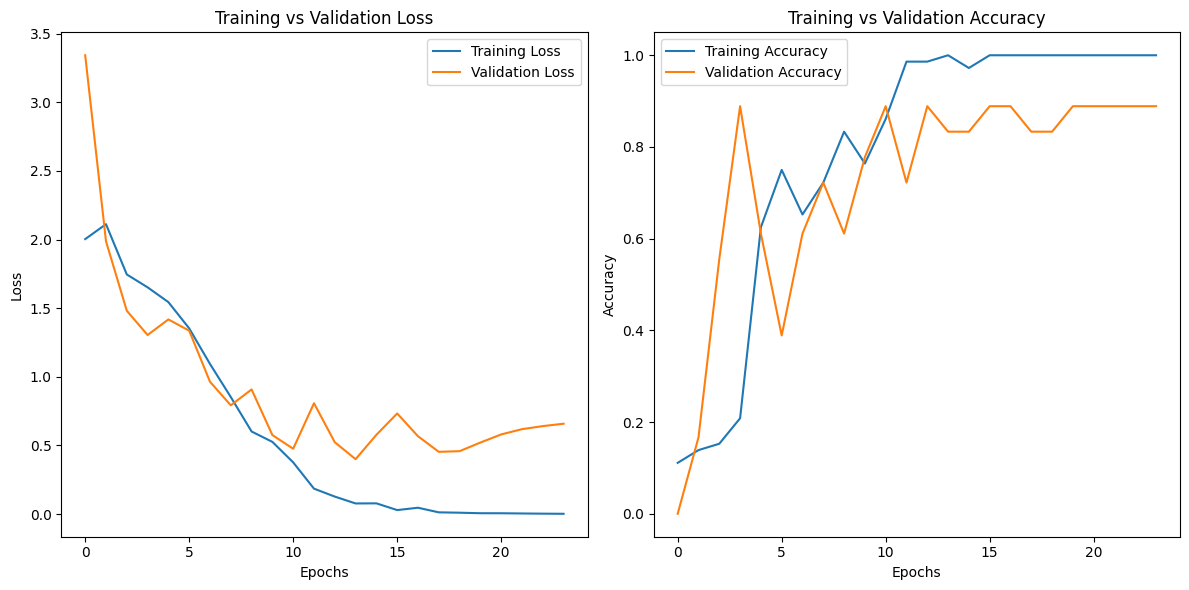

In [21]:
import matplotlib.pyplot as plt



# Plotting the Training and Validation Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()
